# <center> Predicting the revenue of the movies based on budget
### <center> By - Ming Zhang, Rehan Mondal, Caroline Lu and Jingwen Leng

### <center> Introduction


The entertainment industry has always been a profitable field, especially movies. However, with great profit comes great investment. Most modern-day movies require a budget of around 100 million dollars(1). It is crucial for investors/directors to have a general idea of how much profit they can make based on their investment. Thus, this project centers around studying the profitability of a movie before it is released, predicting revenues based on budget using Knn regression (since most movies fall under a general range of budget and there are rarely extreme outliers)

The question we will try to answer with our project is what is the revenue of a movie based on budget. The data set, which consists of 5000 movies from TMDB, will be separated into training and testing sets. Using budget as the predictor, the prediction of test set revenue will be made. 

In the data set “TMDB 5000 Movie Dataset” (from "https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata"), revenues, budget, popularity are recorded for the 5000 movies listed in an excel format. Other columns are listed/included in the data set as well, however because they are written in json or not a significant predictor to the revenue, those columns will be filtered out. Revenues is defined as the total box income of the movie; budget is defined as the funding used for the production; Popularity numbers are built according to the TMDB model which consists of number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day, release date, number of total votes, and previous days score. We will discuss and analyze the correlation of each variable with revenue below.



### <center> Methods & Results:

We used functions from the tidyverse library to manipulate data frames and tibbles. `repr` is used to resize plots contained in this notebook, such as an “Accuracy vs K” graph. `tidymodels` is a package used for statistical and modeling analysis. `GGally` extends ggplot2 by adding several functions to reduce the complexity of combining geoms with transformed data. `cowplot` is used to generate the function `plot-grid` to easily compare plots.

In [7]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)

**DATA CLEANING AND EXPLORATORY ANALYSIS**

Here we download the data from the server from the url, and we saved it as "Revenue.csv" under the /DSCI-100-Project-Group25/Revenue.csv location.


In [8]:
# Getting Dataset from Web
url <- "https://raw.githubusercontent.com/rehan13/DSCI-100-Project-Group25/master/tmdb_5000_movies.csv"
download.file(url, destfile = "Revenue.csv")


Since we already downloaded the revenue file, we now can read it using `read_csv` since it is under the csv format. The data sets does not contain any `NA` value and have column names, so no other arguements are necessary. 

In [9]:
# Raw data being read from the web
revenue_data <- read_csv("Revenue.csv")

head(Revenue_data, n=1)

Parsed with column specification:
cols(
  .default = col_character(),
  budget = col_double(),
  id = col_double(),
  popularity = col_double(),
  release_date = col_date(format = ""),
  revenue = col_double(),
  runtime = col_double(),
  vote_average = col_double(),
  vote_count = col_double()
)

See spec(...) for full column specifications.



budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2.37e+08,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 878, ""name"": ""Science Fiction""}]",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""space war""}, {""id"": 3388, ""name"": ""space colony""}, {""id"": 3679, ""name"": ""society""}, {""id"": 3801, ""name"": ""space travel""}, {""id"": 9685, ""name"": ""futuristic""}, {""id"": 9840, ""name"": ""romance""}, {""id"": 9882, ""name"": ""space""}, {""id"": 9951, ""name"": ""alien""}, {""id"": 10148, ""name"": ""tribe""}, {""id"": 10158, ""name"": ""alien planet""}, {""id"": 10987, ""name"": ""cgi""}, {""id"": 11399, ""name"": ""marine""}, {""id"": 13065, ""name"": ""soldier""}, {""id"": 14643, ""name"": ""battle""}, {""id"": 14720, ""name"": ""love affair""}, {""id"": 165431, ""name"": ""anti war""}, {""id"": 193554, ""name"": ""power relations""}, {""id"": 206690, ""name"": ""mind and soul""}, {""id"": 209714, ""name"": ""3d""}]",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",150.4376,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film Corporation"", ""id"": 306}, {""name"": ""Dune Entertainment"", ""id"": 444}, {""name"": ""Lightstorm Entertainment"", ""id"": 574}]","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2009-12-10,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800


As we can see, the data contains cells written in json, which is outside of the class criteria and difficult to understand. Predictors written in json such as spoken language, production countries and genre also have little correlation with the revenue. So we filtered out the unnecessary columns in the code below using `select` and `filter`. Outliers with no record with revenue and budget ( = 0) are filtered out.

In [10]:
# Exploratory Data
revenue_Data_Particulars <- select(revenue_data, vote_average, budget, runtime, popularity, revenue)%>%
filter(revenue > 0, budget > 0)

revenue_Data_Particulars

vote_average,budget,runtime,popularity,revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.2,2.37e+08,162,150.4376,2787965087
6.9,3.00e+08,169,139.0826,961000000
6.3,2.45e+08,148,107.3768,880674609
⋮,⋮,⋮,⋮,⋮
7.4,20000,111,0.212443,99000
6.9,7000,77,23.307949,424760
6.6,220000,81,14.269792,2040920


As of now, we have a single giant data frame consisting of all the data of TMDB movie. If we pass all of the revenue data into our model, we would not have any data to use as a measure of how accurate the model is. If we use the data that we have used to train the model before, the model will recognize that data because it has “seen” it before and will most likely produce a faulty accuracy that is higher than reality.

Therefore, to allow a fair process of measuring the model’s accuracy, we must calculate its accuracy based on how accurate it is at predicting revenues that it hasn’t “seen” before. To do this, we split the data into training and testing datasets and only use the training dataset to create our regression model. By doing so, we will have a set of data that the machine learning hasn't seen before.

To do this, we will use the golden ratio which is a 75-25% ratio of training and testing datasets respectively. The strata statement can shuffle and ensure the data is not split unrepresentatively.

To make sure that this process is replicable, we use set.seed().

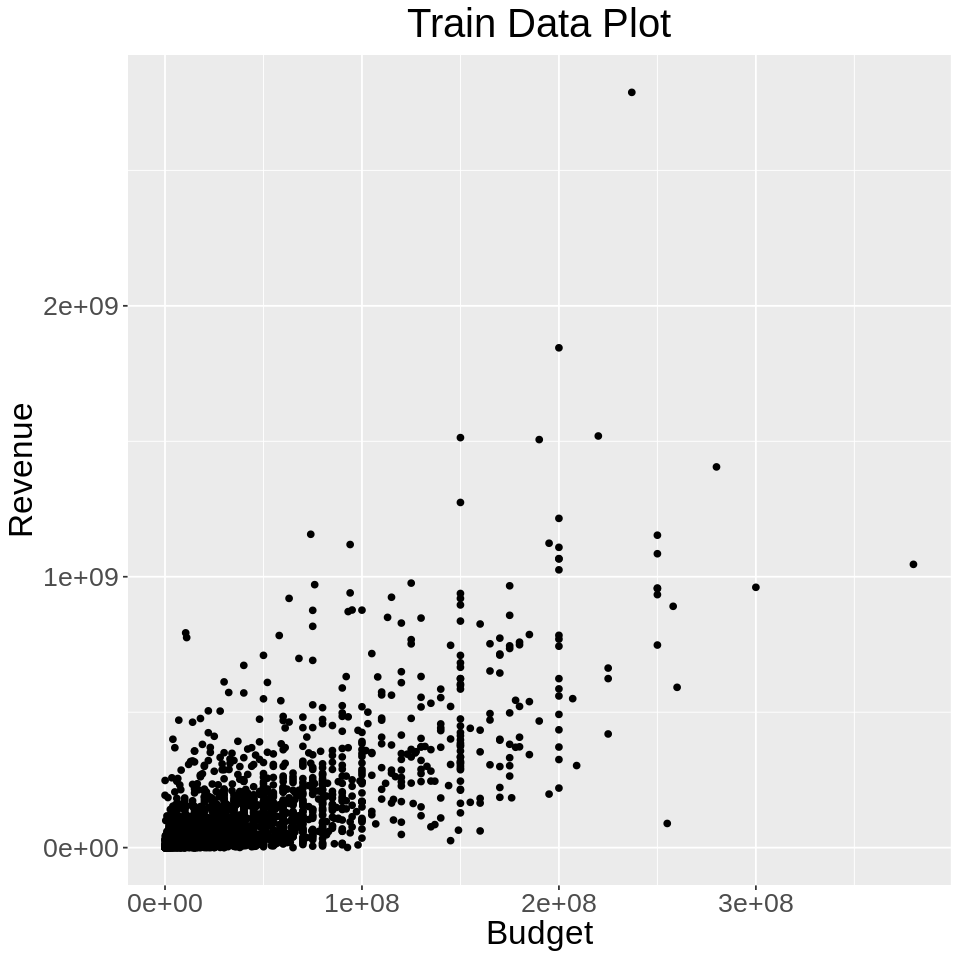

In [35]:
# Train / Test Data
set.seed(15)
revenue_split <- initial_split(Revenue_Data_Particulars, prop = 0.75, strata = revenue)
revenue_train <- training(revenue_split)
revenue_test <- testing(revenue_split)

# Graph for train data
revenue_train_diagram <- revenue_train %>%
    ggplot(aes(x = budget, y = revenue)) +
    geom_point()+
    labs(x = "Budget", y = "Revenue")+
    ggtitle("Train Data Plot") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
revenue_train_diagram   

Below we use `ggpairs` to analyze the correlation between revenues and the predictors "vote_average", "budget", "runtime", and "popularity". 

As we can see, the correlation between budget and revenue is the strongest, and it is also our subject of interest since we are trying to predict revenues based off budget which can directly influence the profit of the investors. All the other predictos have little to no correlation with revenues. Other predictos such as popularity are only relevant or in-existence after the production of the movie which are also not reliable predictors to understand revenue before the investment. For example, Popularity numbers are built according to the TMDB model which consists of number of votes for the day, number of views for the day, number of users who marked it as a "favourite" for the day, Number of users who added it to their "watchlist" for the day, release date, number of total votes, and previous days score (which are only recorded after the movie is produced).

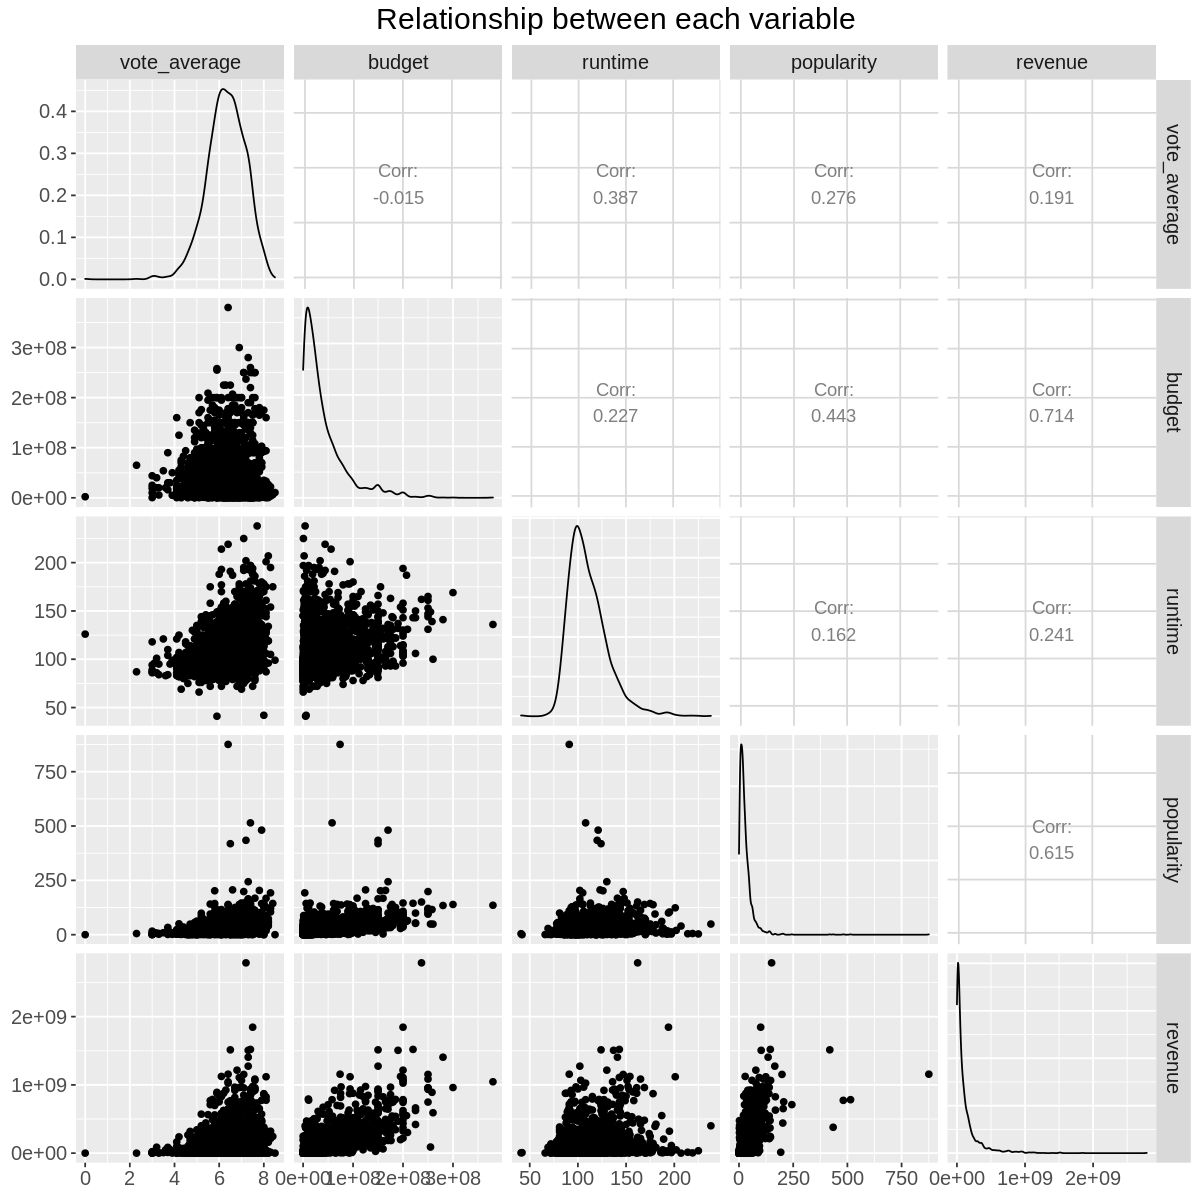

In [37]:
# Show the relationship (correlation) between variables
options(repr.plot.width = 10, repr.plot.height = 10)
relationship_revenue <- ggpairs(revenue_train) +
                        ggtitle("Relationship between each variable")+
                        theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))
relationship_revenue 

**Knn-nearest neighbor regression model training**

First, we created a recipe using the `recipe` functions with the variables of interest (budget) using the training dataset and assign your answer to an object named `revenue_recipe`. We also thought of scaling `(step_scale)` and centering `(step_center)` steps for all of the predictors so that they each have a mean of 0 and standard deviation of 1, but it was not neccessary because we only have one predictor, and standarization can cause a loss of intepretation. 

In [13]:
# Create recipe
revenue_recipe <- recipe(revenue ~ budget, data = revenue_train)

If we split our overall training data once, our best parameter choice will depend strongly on our luck (since whatever data that lands in the validation set is random). By using multiple different train / validation splits, a better accuracy/representation of the data can be estimated, which will lead to a better choice of the number of neighbours $K$ for the overall set of training data. 

In cross-validation, we split our overall training data into $x$ evenly-sized chunks, and then iteratively use 1 chunk as the validation set and combine the remaining $x−1$ chunks as the **training set.**

We decided to split our overall training data up in multiple different ways using `vfold_cv`, train and evaluate a regression model for each split, and then choose the parameter based on all of the different results. The v value is set as 5 which is the number of folds, and we set **revenue** as the strata arguement.  


In [14]:
# 5 fold cross-validation 
revenue_vfold <- vfold_cv(revenue_train, v = 5, strata = revenue)

We created **revenue_spec** using the `nearest_neighbor` function.

In order to improve our regression model, we need to change the parameter: number of neighbours, $K$. Since cross-validation helps us evaluate the accuracy of our model, we can use cross-validation to pick the value of $K$ that gives us the best accuracy. 

Using `tune()` in `tidymodels` package, each parameter in the model can be altered/attempted rather than given a specific value. 


In [15]:
# Create KNN model
revenue_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("regression")

using `workflow`, we can chain together multiple data analysis steps without a lot of otherwise necessary code for intermediate steps. We use the **revenue_recipe** and **revenue_spec** we have created previously in the workflow. 

In [16]:
# Fitting the data in knn model
revenue_wkflw <- workflow() %>%
  add_recipe(revenue_recipe) %>%
  add_model(revenue_spec)

revenue_wkflw

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


We can use `tibble` to create a set of values we will be using for the `grid` arguement (the range of parameter we will be testing). Here, we indicated the $k$ value to range from 1 to 500, and step by 2. 

In [17]:
# Setting the gridvals.
gridvals <- tibble(neighbors = seq(from = 1, to = 500, by = 2))

We can then use the `tune_grid` function to fit the model for each value in a range of parameter values. For the resamples argument, we input the cross-validation **revenue_vfold** we created earlier. The grid argument specifies that the tuning should try  𝑋  amount of values of the number of neighbors  𝐾  when tuning, we input the **gridvals** object we created earlier to indicate the range of parameters we would like to try. 

We then used `filter` to only list out rmse (which represent $RMSPE$: **root mean square prediction error**) to use to evaluate for the best k value.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,223021979,5,6380200,Model001
3,rmse,standard,169171106,5,8013643,Model002
5,rmse,standard,155107610,5,7146031,Model003
⋮,⋮,⋮,⋮,⋮,⋮,⋮
495,rmse,standard,156163194,5,11683386,Model248
497,rmse,standard,156248524,5,11703937,Model249
499,rmse,standard,156324353,5,11703649,Model250


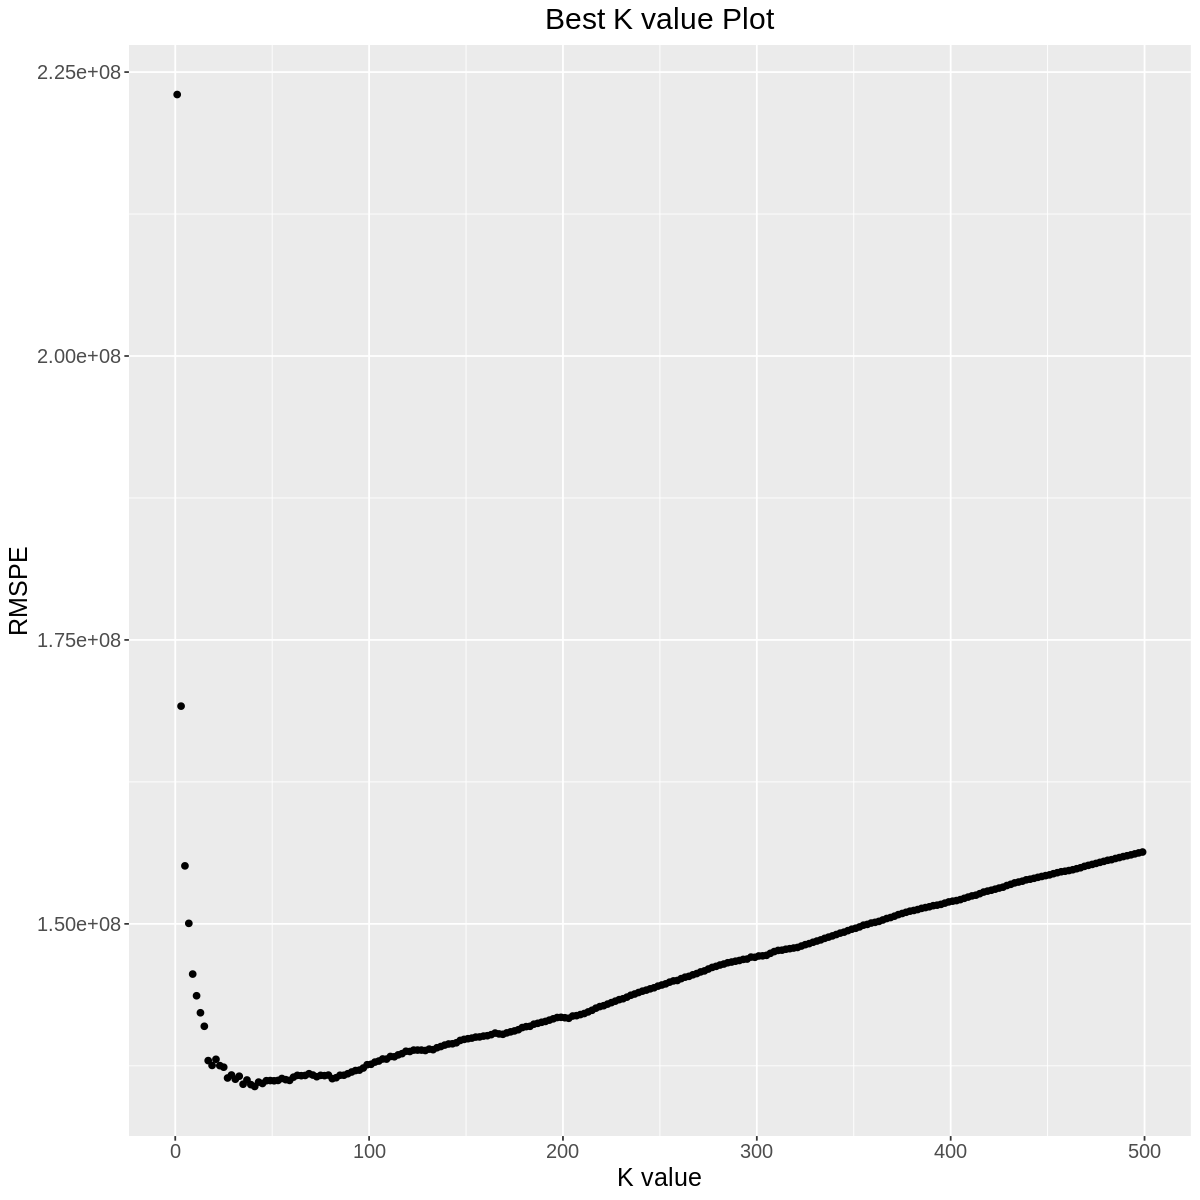

In [38]:
# Results of the model.
revenue_results <- revenue_wkflw %>%
  tune_grid(resamples = revenue_vfold, grid = gridvals) %>%
  collect_metrics() %>%
  filter(.metric == "rmse")

# Plot K Values
revenue_results_graph <- revenue_results %>%
    ggplot(aes(x = neighbors, y = mean))+
    geom_point()+
    labs(x = "K value", y = "RMSPE") +
    ggtitle("Best K value Plot") +
    theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))


revenue_results
revenue_results_graph

Here we can see neighbor $k = 41$ gives us the minimum $RMSPE$.  

In [39]:
# Exact K value
revenue_min <- revenue_results %>%
  filter(mean == min(mean))

revenue_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
41,rmse,standard,135682274,5,7966442,Model021


We assigned the best $k$ to `k_min`, and use the best k value to recreate our model following the same steps as before.

In [40]:
# Getting the best fit for the model
k_min <- revenue_min %>%
        pull(neighbors)

revenue_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) %>%
         set_engine("kknn") %>%
         set_mode("regression")

revenue_best_fit <- workflow() %>%
         add_recipe(revenue_recipe) %>%
         add_model(revenue_best_spec) %>%
         fit(data = revenue_train)

Finally, we will pass the testing dataset into our final regression model. The model will predict the revenue using the `predict()` function function, and be use `bind_cols` to combine with the revenue_test column for readability. We will compare its predictions with the actual labels.

In [41]:
# Summary data
revenue_summary <- revenue_best_fit %>%
          predict(revenue_test) %>%
          bind_cols(revenue_test) %>%
          metrics(truth = revenue, estimate = .pred)
revenue_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,1.206024e+08
rsq,standard,4.573652e-01
mae,standard,7.778129e+07


At last, we visualize our prediction using `ggplot` functions to evaluate if our model is overfitting, underfitting or a good fit for our target.

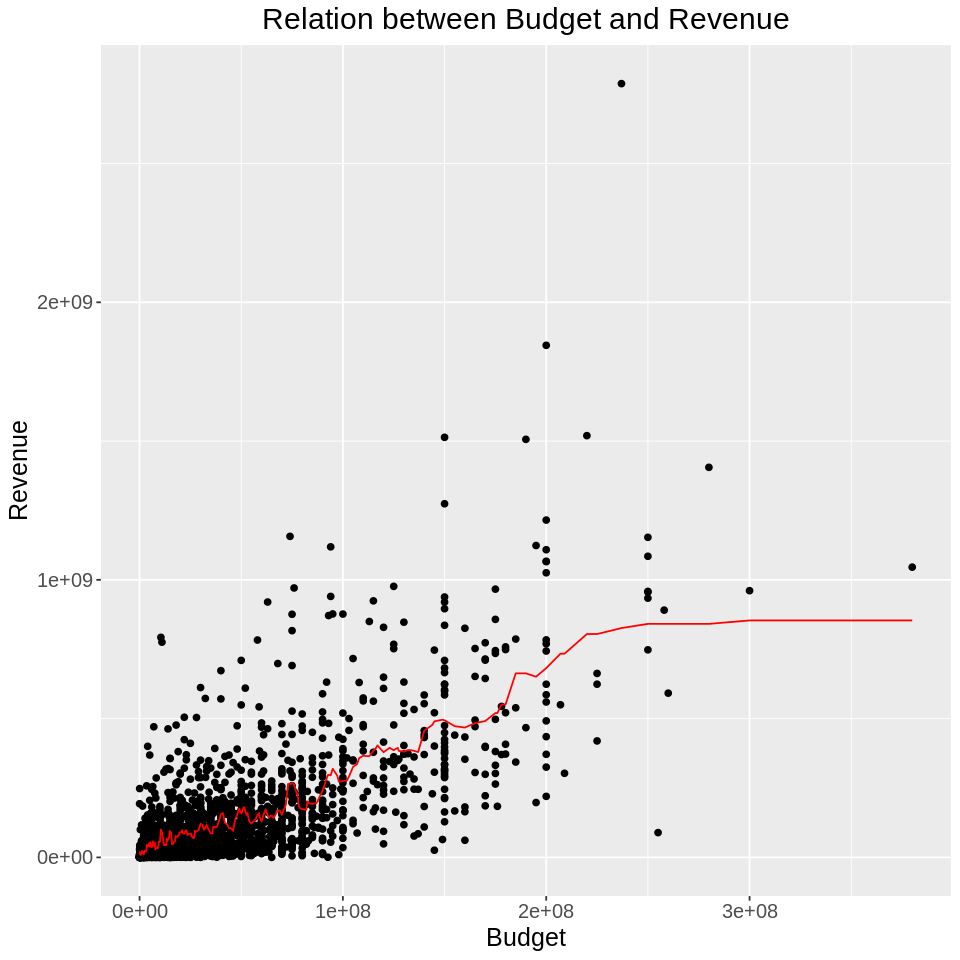

In [42]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Regression Plot
revenue_preds <- revenue_best_fit %>%
                  predict(revenue_train)%>%
                  bind_cols(revenue_train)%>%
                select(.pred, revenue, budget)
revenue_Budget_plot <- ggplot(revenue_preds, aes(x = budget, y = revenue)) +
                geom_point() +
                geom_line (data = revenue_preds, mapping = aes (x = budget, y = .pred), color = "red")+
                xlab ("Budget")+
                ylab("Revenue")+
                ggtitle("Relation between Budget and Revenue")+
                theme(text = element_text(size = 15), plot.title = element_text(hjust = 0.5))

revenue_Budget_plot

### <center> Expected outcomes, significance and discussion:

**Expected outcome**

This project centers around studying the profitability of a movie before it is released, predicting revenues based on budget using Knn regression. By analyzing the data set, which consists of 5000 movies from TMDB, a correlation between budget and revenue can be established. According to the market feedback, a larger production (budget) will usually indicate higher qualities of production, indicating a higher revenue. However, as budget exceeds a certain limit, it will reach its total capacity for revenue feedback due to the limited resources of the market. Thus, we hypothesize that a revenue and budget will have a positive correlation, but our model will streamline at a maximum capacity of revenue since that is the limitation of KNN nearest neighbor regression(which lose accuracy beyond the range of the training data).

**Summary of Results**


The result discovered through the model and supports our hypothesis. as we expected, we found the relationship between the profitability of a movie and the revenues is positive within the budget range of $0$ to $2 \cdot 10^8$, after that the slope of the budget and the revenue will go close to 0, which means our prediction of the revenue will stay constant as the budget increase. This limitation is caused by the use of KNN nearest-neighbor regression since it can only predict accurately within our range. The $RMSPE$ from our result is $1.316789 \cdot 10^8$, which is approximate $1/10$ of our revenue. This is not a significant mistake, however this model can be improved further.  

We find that the revenue of a film is most closely related to the investment cost of the film. Therefore, if we want to make the film more profitable, we have to increase the investment cost of the film to some extent. KNN regression is very advantageous because it has strong elasticity to noise and effective data training in the case of training large amounts of data. We also have a close range of budget with very few outliers outside of the range so KNN regression works better than linear regression. By looking at the relationship_revenue graph, we  can see the correlation between budget and revenue is 0.69, whereas the others are below 0.6. This is why we use only one predictor in our project, since others have weak correlation with the target variable. If we use those weak predictors, the K value will be affected and the prediction will be less accurate and does not serve our purpose of prediction. As indicated by the graph "Relation Between Budget and Revenue", it is a perfect fit as it is neither underfitting or overfitting, thus it will be able to make reasonable prediction to some extend. 


**Impact of Results**

"Movie revenue depends on multiple factors such as cast, budget, film critic review, MPAA rating, release year." (Apte, 2011). However, due to the complexity and multi-dimensionality of the multiple factors, an accurate model is difficult to create with those factors together. However, by analyzing the relationship between budget and revenue which have similar range and values, we can visualize trends in production investment and revenue. Movie production requires large sums of investment and subsequent effort, so it is crucial to understand how revenue is linked with budget. By creating this model, we successfully visualized the correlation and future predictions can be made.  Such a prediction could be very useful for the movie studio which will be producing the movie so they can decide on expenses like artist compensations, advertising, promotions, etc. accordingly (Apte, 2011). Movie theatres will also be able to estimate the revenues they would generate from screening a particular movie based on given budget.  

**Future Questions**

According to our findings,  the correlation between revenue and budget is the strongest. This raises the question - Would a higher budget always indicate a higher revenue? 
Besides increasing the budget, we should think about what other ways we can improve our model to predict the revenue of the film. The future questions that our research could lead to is to what extent the increase in budget would affect the revenue of a movie belonging to a particular genre. Building onto that we can also do further research to improve the other predictors that can be used for data analysis. The research can also qualify as a classification problem if we choose to focus on a particular category of a movie or a particular production house, and compare which production company generates greater revenue (Mueller, 2021). Box office trends largely reflect audience satisfaction with a film. So this raises the question of whether it's more important to increase the budget, or to focus on the content and quality of the movie.

### <center>Citation

(TMDb), T. M. D. (2017, September 28). TMDB 5000 movie dataset. Kaggle. Retrieved April 7, 2022, from https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata 

Mueller, A. (2021, December 1). Why movies cost so much to make. Investopedia. Retrieved April 7, 2022, from https://www.investopedia.com/financial-edge/0611/why-movies-cost-so-much-tomake.aspx#:~:text=Movie%20budgets%20can%20average%20around,and%20special%20effects%2C%20and%20marketing 

Nikhil, A. (2021, December 16). Predicting movie revenue - cs229.stanford.edu. Predicting Movie Revenue. Retrieved April 8, 2022, from https://cs229.stanford.edu/proj2011/ApteForssellSidhwa-PredictingMovieRevenue.pdf 